In [1]:
import os, warnings
warnings.simplefilter('ignore')

import ee
#ee.Authenticate()
ee.Initialize()

#change directory
os.chdir('../../')

from functions import extract_ee, extract_osm, plot, operations

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import xarray as xr

from shapely.geometry import LineString, Point, MultiPoint

In [4]:
line_gdf = gpd.read_file('data/line.gpkg')

In [5]:
line_gdf = line_gdf.dissolve()

In [6]:
line_gdf = line_gdf.to_crs(epsg = 7755) #metric crs

In [7]:
line = line_gdf['geometry'][0]
distance_delta = 10 # get point on line at every 10m 
# generate the equidistant points
distances = np.arange(0, line.length, distance_delta)
points = MultiPoint([line.interpolate(distance) for distance in distances])

In [9]:
pp = gpd.GeoDataFrame()
pp['geometry'] = gpd.GeoSeries(points)
pp = pp.set_crs(epsg = 7755)
pp = pp.to_crs(epsg = 4326)
pp = pp.explode()

pp.to_file('data/l2p.gpkg')

In [12]:
#lst resampled to NDVI resolution using xarray interpolation
lst_zs = operations.calculate_zonalstats('data/l2p.gpkg', 'data/test_l8_lst_10m.tiff')

In [13]:
ndvi_zs = operations.calculate_zonalstats('data/l2p.gpkg', 'data/test_ndvi.tiff')

In [14]:
df = pd.DataFrame({'NDVI':ndvi_zs['mean'], 'LST':lst_zs['mean']})

In [16]:
df_norm = (df - df.min()) / (df.max() - df.min())

<AxesSubplot:>

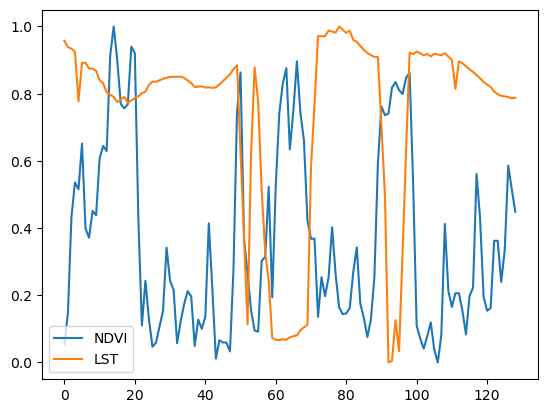

In [17]:
df_norm.plot()